In [19]:

library(MASS)
library(dplyr)
library(ggplot2)
library(car)
library(multcomp)
#Set up enviorment

ERROR: Error in library(multcomp): there is no package called ‘multcomp’


In [54]:
# Install and load the rpart package
if (!require(rpart)) {
    install.packages("rpart", dependencies = TRUE)
    library(rpart)
}

Loading required package: rpart



In [55]:
# Load and explore our data
help(crabs)

crabs {MASS},R Documentation


In [56]:
data(crabs)

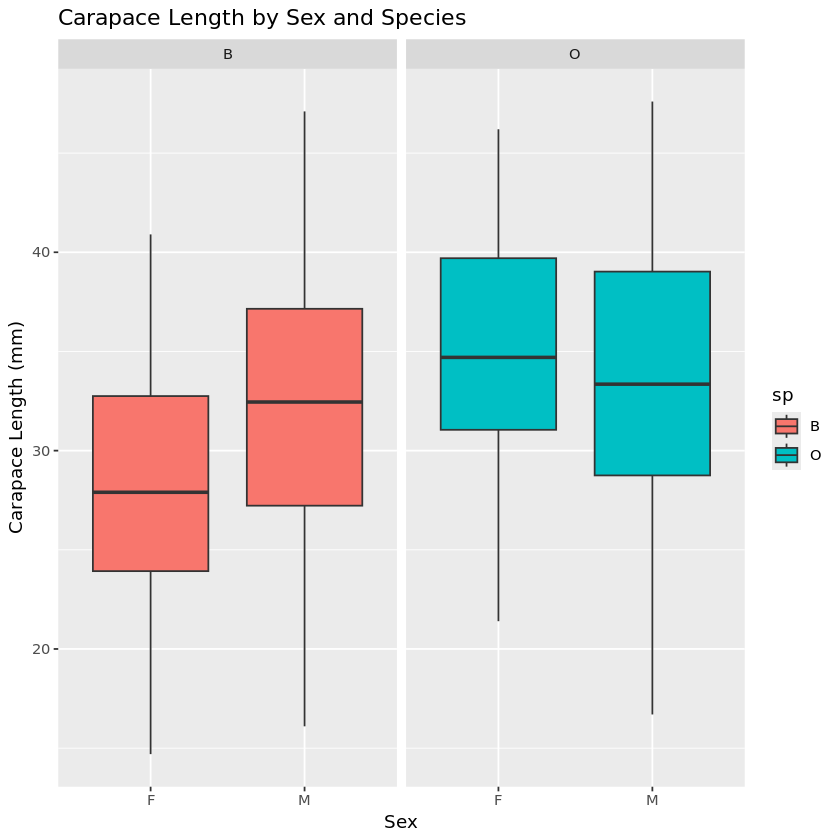

In [57]:
# Basic visualizations to understand data distribution
ggplot(crabs, aes(x = sex, y = CL, fill = sp)) +
  geom_boxplot() +
  labs(title = "Carapace Length by Sex and Species", x = "Sex", y = "Carapace Length (mm)") +
  facet_wrap(~sp)

In [58]:
# Question 1: Effect of sex on carapace length in each species
# Using ANOVA to assess the impact of sex within each species
anova_results <- aov(CL ~ sp * sex, data = crabs)
summary(anova_results)

#Analysis of the results of ANOVA
print("Understanding the Results
The ANOVA analysis yielded the following key results:

Main effect of species (sp): Significant with a p-value of 0.0000257, indicating a clear difference in carapace length between the two species.
Main effect of sex (sex): Not significant with a p-value of 0.1181, suggesting that overall, sex does not have a significant effect on carapace length when not considering species.
Interaction effect between species and sex (sp:sex): Significant with a p-value of 0.0116, indicating that the effect of sex on carapace length varies between species.
Addressing the Specific Question
The question asks if there is an effect of sex on carapace length in either of the two species. Although the main effect of sex was not significant, the significant interaction between species and sex implies that we should look at the effect of sex within each species separately rather than combined. The significant interaction tells us that the influence of sex on carapace length is different in the two species.")



# Conduct separate t-tests for each species to determine is sex is significant in the carapace length per species
crabs_b <- subset(crabs, sp == "B")
crabs_o <- subset(crabs, sp == "O")

t_test_b <- t.test(CL ~ sex, data = crabs_b)
t_test_o <- t.test(CL ~ sex, data = crabs_o)

print(t_test_b)
print(t_test_o)

#Analysis of the T-test results
print("Based on these results:
In the first species (potentially the blue species), there is a significant effect of sex on carapace length, with males being significantly larger than females.
In the second species (potentially the orange species), there is no significant effect of sex on carapace length, indicating that males and females are similar in size.
This finding supports the significant interaction observed in the ANOVA, which suggested that the effect of sex on carapace length varies between species. Specifically, sex significantly affects carapace length in one species but not in the other.")

             Df Sum Sq Mean Sq F value   Pr(>F)    
sp            1    838   838.5  18.585 2.57e-05 ***
sex           1    111   111.2   2.464   0.1181    
sp:sex        1    293   293.1   6.496   0.0116 *  
Residuals   196   8843    45.1                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "Understanding the Results\nThe ANOVA analysis yielded the following key results:\n\nMain effect of species (sp): Significant with a p-value of 0.0000257, indicating a clear difference in carapace length between the two species.\nMain effect of sex (sex): Not significant with a p-value of 0.1181, suggesting that overall, sex does not have a significant effect on carapace length when not considering species.\nInteraction effect between species and sex (sp:sex): Significant with a p-value of 0.0116, indicating that the effect of sex on carapace length varies between species.\nAddressing the Specific Question\nThe question asks if there is an effect of sex on carapace length in either of the two species. Although the main effect of sex was not significant, the significant interaction between species and sex implies that we should look at the effect of sex within each species separately rather than combined. The significant interaction tells us that the influence of sex on carapace len


	Welch Two Sample t-test

data:  CL by sp
t = -4.2372, df = 197.92, p-value = 3.468e-05
alternative hypothesis: true difference in means between group B and group O is not equal to 0
95 percent confidence interval:
 -6.000861 -2.189139
sample estimates:
mean in group B mean in group O 
         30.058          34.153 

[1] "Interpretation\nStatistical Significance: The t-test results are statistically significant, as evidenced by the very low p-value (3.468e-05). This p-value is far below the typical significance threshold of 0.05, strongly rejecting the null hypothesis that there is no difference between the mean carapace lengths of the two species.\nEffect Size and Direction: The negative t-value indicates that the mean carapace length of species B is significantly smaller than that of species O. The confidence interval (-6.000861 to -2.189139) further supports this, showing that the mean difference is not only significant but also quantitatively substantial, ranging between approxi

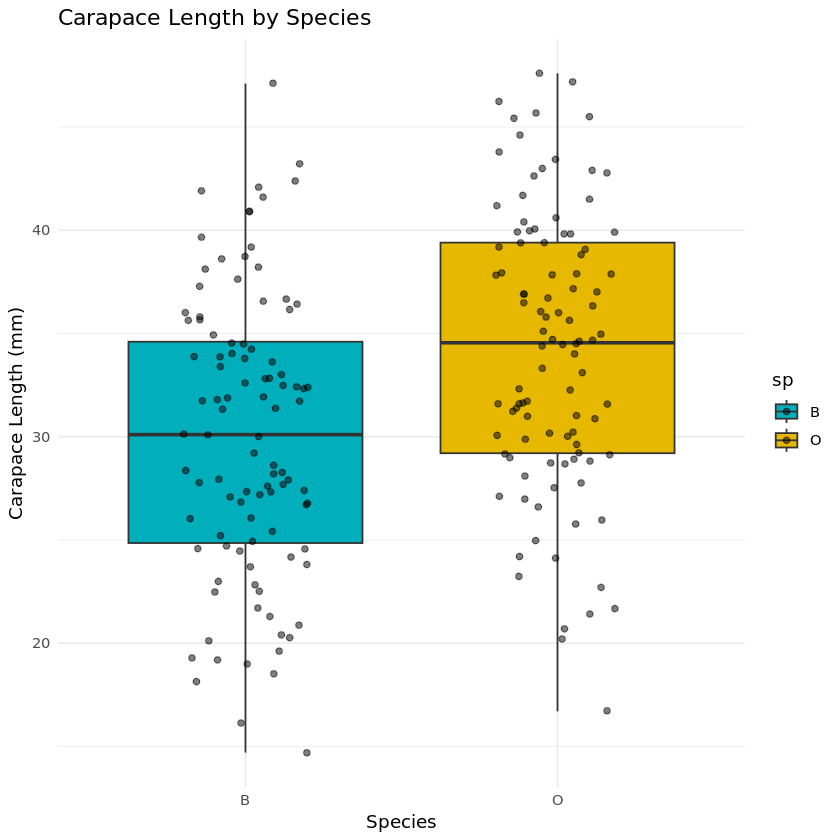

In [59]:

# Question 2: Significant difference in carapace length between the two species
t_test_species <- t.test(CL ~ sp, data = crabs)
print(t_test_species)

# Visual representation
ggplot(crabs, aes(x = sp, y = CL, fill = sp)) +
  geom_boxplot() +  # Adds boxplot
  geom_jitter(color = "black", width = 0.2, alpha = 0.5) +  # Adds jittered points
  scale_fill_manual(values = c("#00AFBB", "#E7B800")) +  # Custom color palette
  labs(title = "Carapace Length by Species", x = "Species", y = "Carapace Length (mm)") +
  theme_minimal() 

#Interpretation!
print("Interpretation
Statistical Significance: The t-test results are statistically significant, as evidenced by the very low p-value (3.468e-05). This p-value is far below the typical significance threshold of 0.05, strongly rejecting the null hypothesis that there is no difference between the mean carapace lengths of the two species.
Effect Size and Direction: The negative t-value indicates that the mean carapace length of species B is significantly smaller than that of species O. The confidence interval (-6.000861 to -2.189139) further supports this, showing that the mean difference is not only significant but also quantitatively substantial, ranging between approximately 2.19 mm and 6.00 mm.")

# A tibble: 2 × 2
  sp    cor_FL_BD
  <fct>     <dbl>
1 B         0.989
2 O         0.982


`geom_smooth()` using formula = 'y ~ x'


[1] "Correlation Results\nSpecies B\nCorrelation Coefficient (cor_FL_BD): 0.989\nSpecies O\nCorrelation Coefficient (cor_FL_BD): 0.982\nInterpretation\nStrength of Correlation: Both correlation coefficients are extremely high, close to 1, which indicates a very strong positive correlation. This means that as the frontal lobe size increases, the body depth also increases in a closely related manner for both species.\nStatistical Significance: Although the exact p-values are not provided in your summary, correlation coefficients of this magnitude (greater than 0.98 in both cases) are typically associated with very high statistical significance. This suggests that the likelihood of these correlations occurring by chance is extremely low."


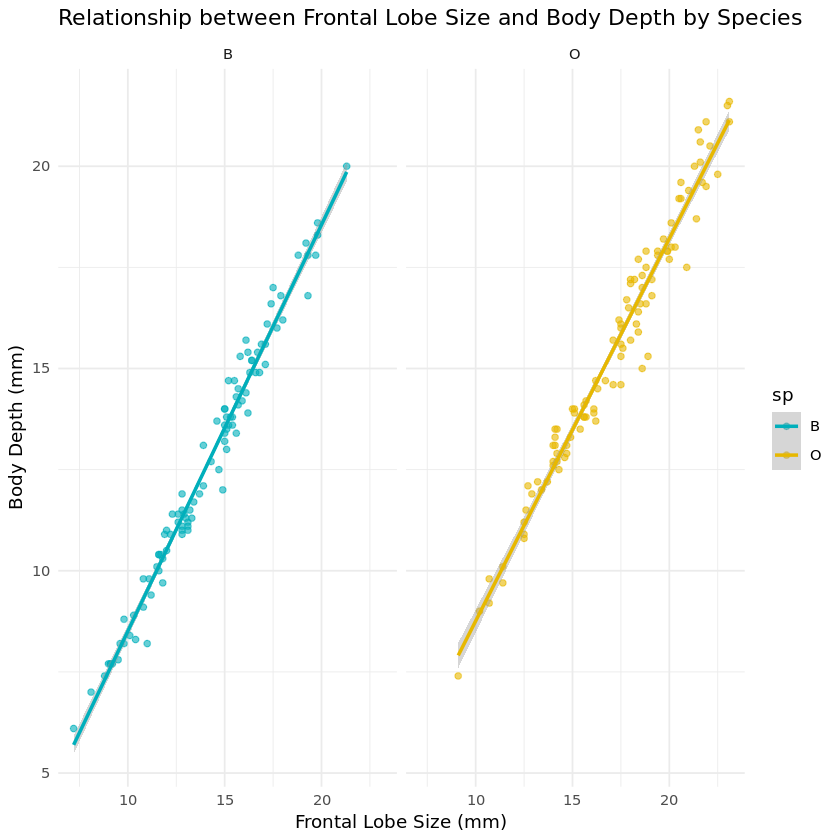

In [60]:
# Question 3: Correlation between frontal lobe size and body depth in each species
correlation_analysis <- crabs %>%
  group_by(sp) %>%
  summarise(cor_FL_BD = cor(FL, BD), .groups = 'drop')
print(correlation_analysis)

ggplot(crabs, aes(x = FL, y = BD, color = sp)) +
  geom_point(alpha = 0.6) +  # Adds the scatter points with some transparency
  geom_smooth(method = "lm", se = TRUE) +  # Adds a linear regression line with confidence interval
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +  # Custom color palette for species
  facet_wrap(~sp) +  # Creates a facet for each species
  labs(title = "Relationship between Frontal Lobe Size and Body Depth by Species",
       x = "Frontal Lobe Size (mm)", y = "Body Depth (mm)") +
  theme_minimal()

#Analysis:
print("Correlation Results
Species B
Correlation Coefficient (cor_FL_BD): 0.989
Species O
Correlation Coefficient (cor_FL_BD): 0.982
Interpretation
Strength of Correlation: Both correlation coefficients are extremely high, close to 1, which indicates a very strong positive correlation. This means that as the frontal lobe size increases, the body depth also increases in a closely related manner for both species.
Statistical Significance: Although the exact p-values are not provided in your summary, correlation coefficients of this magnitude (greater than 0.98 in both cases) are typically associated with very high statistical significance. This suggests that the likelihood of these correlations occurring by chance is extremely low.")

# A tibble: 4 × 3
  sp    sex   cor_FL_BD
  <fct> <fct>     <dbl>
1 B     F         0.982
2 B     M         0.992
3 O     F         0.979
4 O     M         0.994


`geom_smooth()` using formula = 'y ~ x'


[1] "Conclusion\nThe conclusion from Question 3 does not change when accounting for sex.\n      The strong correlation between frontal lobe size and body depth is evident \n      and consistent across all groups—both sexes in both species—indicating a fundamental and uniform morphological relationship that is likely reflective of genetic, developmental, or functional constraints or advantages."


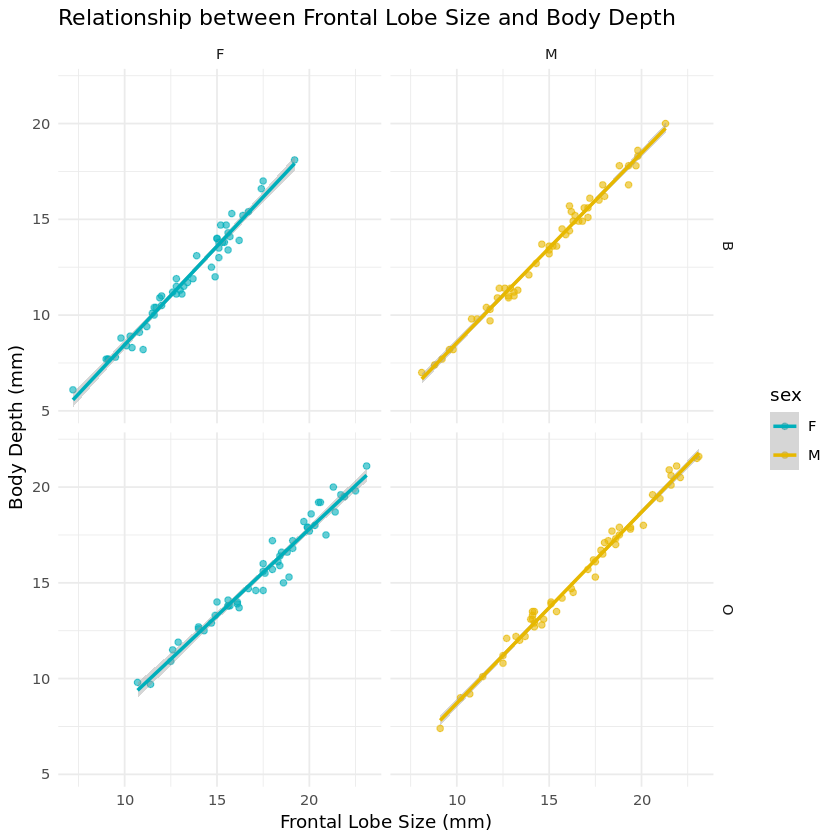

In [61]:
# Question 4: Impact of sex on the correlation between frontal lobe size and body depth
correlation_by_sex <- crabs %>%
  group_by(sp, sex) %>%
  summarise(cor_FL_BD = cor(FL, BD), .groups = 'drop')
print(correlation_by_sex)


ggplot(crabs, aes(x = FL, y = BD, color = sex)) +
  geom_point(alpha = 0.6) +  # Adds the scatter points with some transparency
  geom_smooth(method = "lm", se = TRUE) +  # Adds a linear regression line with confidence interval
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +  # Custom color palette for sex
  facet_grid(sp ~ sex) +  # Creates a facet for each combination of species and sex
  labs(title = "Relationship between Frontal Lobe Size and Body Depth",
       x = "Frontal Lobe Size (mm)", y = "Body Depth (mm)") +
  theme_minimal() 

#Result analysis
print("Conclusion
The conclusion from Question 3 does not change when accounting for sex.
      The strong correlation between frontal lobe size and body depth is evident 
      and consistent across all groups—both sexes in both species—indicating a fundamental and uniform morphological relationship that is likely reflective of genetic, developmental, or functional constraints or advantages.")

In [62]:
#The following code and models, with their analysis serves as questions 5-7.


Call:
lm(formula = FL ~ sp + sex + RW + CL + CW + BD, data = crabs)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09523 -0.26387 -0.00391  0.23086  1.06402 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.28753    0.20207   1.423  0.15638    
spO          1.26532    0.12739   9.933  < 2e-16 ***
sexM        -0.25562    0.10978  -2.328  0.02092 *  
RW           0.02310    0.04994   0.463  0.64423    
CL           0.24715    0.07530   3.282  0.00122 ** 
CW           0.14925    0.06274   2.379  0.01835 *  
BD           0.08029    0.07392   1.086  0.27881    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3874 on 193 degrees of freedom
Multiple R-squared:  0.9881,	Adjusted R-squared:  0.9877 
F-statistic:  2668 on 6 and 193 DF,  p-value: < 2.2e-16


Start:  AIC=-372.46
FL ~ sp + sex + RW + CL + CW + BD

       Df Sum of Sq    RSS     AIC
- RW    1    0.0321 28.994 -374.24
- BD    1    0.1770 29.139 -373.25
<none>              28.962 -372.46
- sex   1    0.8136 29.776 -368.92
- CW    1    0.8491 29.811 -368.69
- CL    1    1.6168 30.579 -363.60
- sp    1   14.8060 43.768 -291.88

Step:  AIC=-374.24
FL ~ sp + sex + CL + CW + BD

       Df Sum of Sq    RSS     AIC
- BD    1    0.1712 29.166 -375.07
<none>              28.994 -374.24
+ RW    1    0.0321 28.962 -372.46
- CW    1    1.0542 30.049 -369.10
- CL    1    1.5976 30.592 -365.52
- sex   1    3.3122 32.307 -354.61
- sp    1   16.9010 45.895 -284.39

Step:  AIC=-375.07
FL ~ sp + sex + CL + CW

       Df Sum of Sq    RSS     AIC
<none>              29.166 -375.07
+ BD    1     0.171 28.994 -374.24
+ RW    1     0.026 29.139 -373.25
- CW    1     1.058 30.223 -369.94
- CL    1     2.595 31.761 -360.02
- sex   1     3.434 32.600 -354.80
- sp    1    32.386 61.552 -227.69



Call:
lm(formula = FL ~ sp + sex + CL + CW, data = crabs)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.08740 -0.26406  0.01341  0.24617  1.07760 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.26714    0.14192   1.882  0.06128 .  
spO          1.36641    0.09286  14.715  < 2e-16 ***
sexM        -0.30182    0.06298  -4.792 3.27e-06 ***
CL           0.28073    0.06740   4.165 4.67e-05 ***
CW           0.15847    0.05959   2.659  0.00848 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3867 on 195 degrees of freedom
Multiple R-squared:  0.988,	Adjusted R-squared:  0.9878 
F-statistic:  4015 on 4 and 195 DF,  p-value: < 2.2e-16


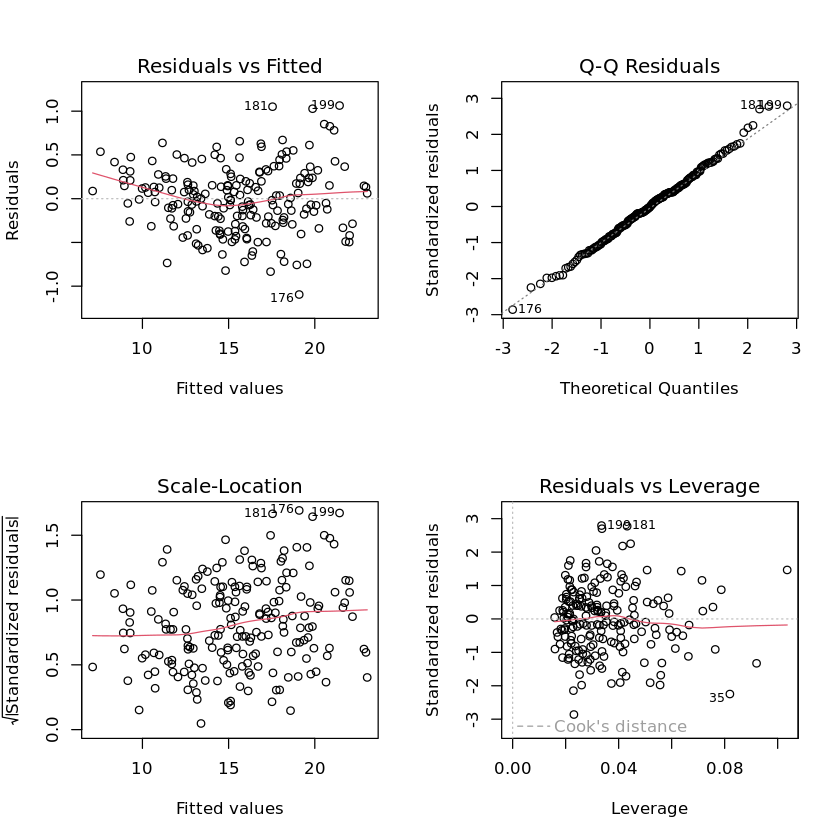

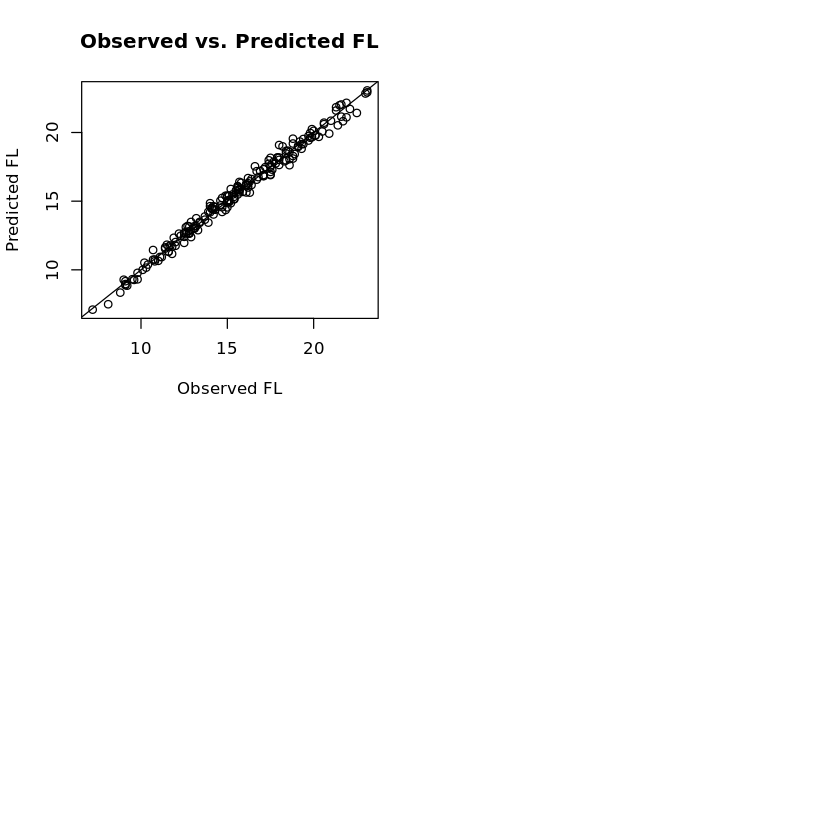

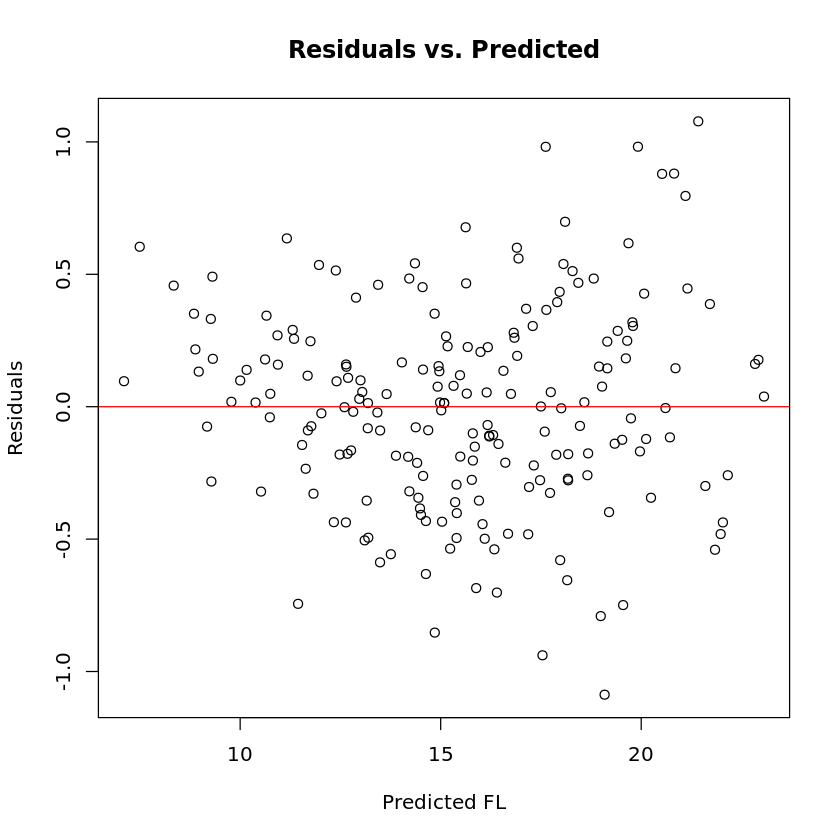

In [63]:
# Build the initial full model
full_model <- lm(FL ~ sp + sex + RW + CL + CW + BD, data = crabs)
summary(full_model)

# Check model diagnostics
par(mfrow = c(2, 2))
plot(full_model)

# Perform stepwise regression using stepAIC from the MASS package
reduced_model <- stepAIC(full_model, direction = "both")
summary(reduced_model)

# Visualize the relationship between observed and predicted values
plot(crabs$FL, predict(reduced_model), main = "Observed vs. Predicted FL", xlab = "Observed FL", ylab = "Predicted FL")
abline(0, 1)  # Adds a 45-degree line

# Optionally, additional diagnostic plots
par(mfrow = c(1, 1))
plot(predict(reduced_model), residuals(reduced_model), main = "Residuals vs. Predicted", xlab = "Predicted FL", ylab = "Residuals")
abline(h = 0, col = "red")

In [64]:
#Model Review and interpretation

print("Initial Model
The initial model included all potential predictors (sp, sex, RW, CL, CW, BD), and the objective was to predict FL based on these variables. The p-values, standard errors, and t-values suggest varying levels of significance for each predictor in contributing to the model.

Stepwise Reduction Using AIC
The stepwise regression removed predictors one by one, each time choosing the model that offered the lowest AIC. Lower AIC values suggest a model with a better balance of goodness of fit and simplicity. Here’s a summary of the steps:

Removal of RW (Rear Width): This variable's removal led to a slight decrease in AIC, suggesting that RW did not contribute significantly to model quality relative to its complexity.
Removal of BD (Body Depth): Similarly, removing BD further decreased the AIC, indicating that BD was also not a significant predictor in the presence of other variables.
The resulting best model included sp (species), sex, CL (Carapace Length), and CW (Carapace Width) as predictors.

Final Reduced Model
This model is simpler and focuses on the most significant predictors:

Species (sp): Significant effect, with species O having a larger frontal lobe size by approximately 1.366 units compared to species B.
Sex (sex): Significant effect, with males having a smaller frontal lobe size by approximately 0.302 units compared to females.
Carapace Length (CL) and Carapace Width (CW): Both significant, with coefficients indicating that increases in these measurements are associated with increases in frontal lobe size.
      The final model is highly effective at explaining the variability in frontal lobe size, with species and sex appearing as particularly strong predictors. This suggests biological differences in frontal lobe development 
that may be related to evolutionary adaptations or ecological roles that differ between species and between sexes.")

[1] "Initial Model\nThe initial model included all potential predictors (sp, sex, RW, CL, CW, BD), and the objective was to predict FL based on these variables. The p-values, standard errors, and t-values suggest varying levels of significance for each predictor in contributing to the model.\n\nStepwise Reduction Using AIC\nThe stepwise regression removed predictors one by one, each time choosing the model that offered the lowest AIC. Lower AIC values suggest a model with a better balance of goodness of fit and simplicity. Here’s a summary of the steps:\n\nRemoval of RW (Rear Width): This variable's removal led to a slight decrease in AIC, suggesting that RW did not contribute significantly to model quality relative to its complexity.\nRemoval of BD (Body Depth): Similarly, removing BD further decreased the AIC, indicating that BD was also not a significant predictor in the presence of other variables.\nThe resulting best model included sp (species), sex, CL (Carapace Length), and CW (


Call:
lm(formula = FL ~ sp * sex + poly(RW, 2) + poly(CL, 2) + poly(CW, 
    2) + poly(BD, 2), data = crabs)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2022 -0.2411 -0.0202  0.2479  0.9989 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  15.00600    0.08632 173.846  < 2e-16 ***
spO           1.53195    0.12738  12.027  < 2e-16 ***
sexM         -0.25314    0.12689  -1.995 0.047489 *  
poly(RW, 2)1 -4.06689    2.27239  -1.790 0.075111 .  
poly(RW, 2)2  2.14200    0.82315   2.602 0.010001 *  
poly(CL, 2)1 22.20541    7.80750   2.844 0.004947 ** 
poly(CL, 2)2 -2.23193    4.08563  -0.546 0.585516    
poly(CW, 2)1 26.18647    7.71207   3.396 0.000836 ***
poly(CW, 2)2 -3.76345    3.06746  -1.227 0.221397    
poly(BD, 2)1  1.34074    3.54686   0.378 0.705850    
poly(BD, 2)2  5.01641    1.73278   2.895 0.004240 ** 
spO:sexM     -0.24961    0.11794  -2.116 0.035626 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual st

[1] "Coefficients and Significance:\n\nSpecies and Sex: Significant effects for species (especially for species O) and an interaction effect between species O and male sex.\nPolynomial Terms:\nRW: The quadratic term is significant, suggesting a complex relationship with FL.\nCL: Significant linear and non-significant quadratic term, indicating a primarily linear relationship with some curvature.\nCW: Both terms are significant, highlighting a strong nonlinear relationship.\nBD: The second polynomial term is significant, indicating some non-linear effects.\nModel Fit:\n\nResidual Standard Error: 0.3576, relatively low, indicating that the model's predictions are close to the actual data.\nR-squared: 0.9901, suggesting that the model explains 99.01% of the variance in FL, a very high value indicating excellent model fit.\nAdjusted R-squared: 0.9895, slightly adjusted for the number of predictors, which is still exceptionally high.\nF-statistic: Very significant (p < 2.2e-16), indicating 

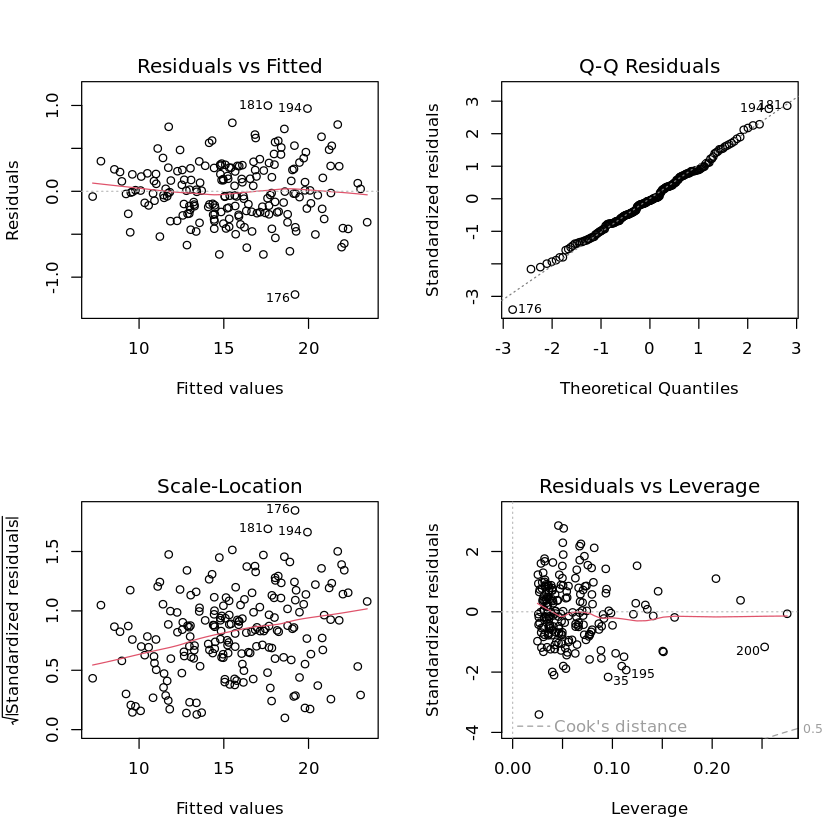

In [65]:
# Build an enhanced linear model with interaction and polynomial terms
enhanced_model <- lm(FL ~ sp * sex + poly(RW, 2) + poly(CL, 2) + poly(CW, 2) + poly(BD, 2), data = crabs)
summary(enhanced_model)

# Check model diagnostics
par(mfrow = c(2, 2))
plot(enhanced_model)

print("Coefficients and Significance:

Species and Sex: Significant effects for species (especially for species O) and an interaction effect between species O and male sex.
Polynomial Terms:
RW: The quadratic term is significant, suggesting a complex relationship with FL.
CL: Significant linear and non-significant quadratic term, indicating a primarily linear relationship with some curvature.
CW: Both terms are significant, highlighting a strong nonlinear relationship.
BD: The second polynomial term is significant, indicating some non-linear effects.
Model Fit:

Residual Standard Error: 0.3576, relatively low, indicating that the model's predictions are close to the actual data.
R-squared: 0.9901, suggesting that the model explains 99.01% of the variance in FL, a very high value indicating excellent model fit.
Adjusted R-squared: 0.9895, slightly adjusted for the number of predictors, which is still exceptionally high.
F-statistic: Very significant (p < 2.2e-16), indicating the model as a whole is statistically significant.")

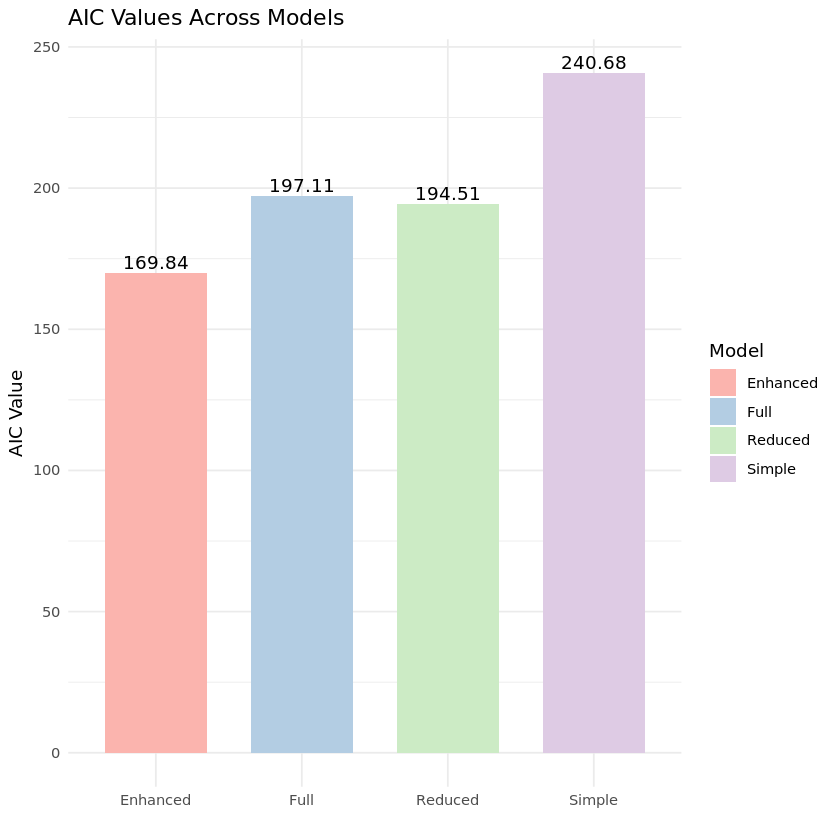

In [73]:
library(ggplot2)

# Build the simplest model
simple_model <- lm(FL ~ sp + CL, data = crabs)
simple_model_aic <- AIC(simple_model)

# Reprint the AIC values from previous models for direct comparison
full_model_aic <- AIC(full_model)
reduced_model_aic <- AIC(reduced_model)
enhanced_model_aic <- AIC(enhanced_model)

# Compare AIC values
aic_values <- c(Full = full_model_aic, Reduced = reduced_model_aic, Enhanced = enhanced_model_aic, Simple = simple_model_aic)
model_names <- names(aic_values)

# Plot AIC values for comparison
aic_data <- data.frame(Model = model_names, AIC = aic_values)
ggplot(aic_data, aes(x = Model, y = AIC, fill = Model)) +
  geom_bar(stat = "identity", width = 0.7) +
  geom_text(aes(label = round(AIC, 2), vjust = -0.3)) +
  labs(title = "AIC Values Across Models", y = "AIC Value", x = "") +
  theme_minimal() +
  scale_fill_brewer(palette = "Pastel1")


In [80]:
#Question 5
print("Are there any covariates that could be omitted from the model?

Full Model Analysis: Some covariates like RW (rear width) and BD (body depth) had higher p-values and were less significant, suggesting they could be omitted without drastically affecting the model's predictive ability.
Reduced Model Steps: The stepwise approach confirmed that removing less significant covariates like RW and BD led to a more parsimonious model without a significant loss in fit, as indicated by the AIC.")

[1] "Are there any covariates that could be omitted from the model?\n\nFull Model Analysis: Some covariates like RW (rear width) and BD (body depth) had higher p-values and were less significant, suggesting they could be omitted without drastically affecting the model's predictive ability.\nReduced Model Steps: The stepwise approach confirmed that removing less significant covariates like RW and BD led to a more parsimonious model without a significant loss in fit, as indicated by the AIC."


In [82]:
#Question 6
print("When exploring diffrent models and using diffrent variables in my linear regression 
      it's clear the best model is the enhanced model. This model looked to fit possible quadratic interations between
      varibales and this ended up being significant and succesful")

[1] "When exploring diffrent models and using diffrent variables in my linear regression \n      it's clear the best model is the enhanced model. This model looked to fit possible quadratic interations between\n      varibales and this ended up being significant and succesful"


In [83]:
#Question 7
print("Insight from Analyses: These modeling exercises revealed that:
Species and carapace length are crucial predictors of frontal lobe size, suggesting significant biological implications.
More complex models do not necessarily provide better insights if simpler models can achieve similar explanatory power.
The interaction between species and sex in the enhanced model suggested nuanced differences in how these factors impact frontal lobe size, but the simplest model suggests focusing on the most statistically impactful predictors might be sufficient for many practical purposes.")

[1] "Insight from Analyses: These modeling exercises revealed that:\nSpecies and carapace length are crucial predictors of frontal lobe size, suggesting significant biological implications.\nMore complex models do not necessarily provide better insights if simpler models can achieve similar explanatory power.\nThe interaction between species and sex in the enhanced model suggested nuanced differences in how these factors impact frontal lobe size, but the simplest model suggests focusing on the most statistically impactful predictors might be sufficient for many practical purposes."


In [84]:
#Why I choose these test stats.
print("Why ANOVA and t-tests?

ANOVA: Helps compare the means of more than two groups (e.g., the impact of species on frontal lobe size across different groups of crabs). It's particularly useful for testing the significance of categorical variables on a continuous outcome.
t-tests: Used to compare the means between two groups (e.g., the difference in frontal lobe size between males and females). This is a simpler form of ANOVA tailored for binary categorical variables.
Assumptions:

Normality: Both tests assume that the residuals are normally distributed.
Equality of Variances (Homoscedasticity): The variance among groups should be roughly equal.
Independence: Observations should be independent of each other.
Checks:

Normality: Checked using QQ plots or Shapiro-Wilk test.
Homoscedasticity: Checked using plots of residuals vs. predicted values or specific tests like Levene’s test.
Independence: Generally assumed based on study design.
2. Use of AIC for Model Selection
AIC (Akaike Information Criterion) is a method used to compare different possible models and determine which one best balances goodness of fit with simplicity.

Why AIC?

Penalizing Complexity: AIC penalizes models for having too many parameters, thus helping to avoid overfitting.
Relative Measure: It’s a relative measure of model quality, which means it allows comparison across different models to find the one that explains the most variance with the fewest parameters.
Assumption:

Likelihood-Based: Assumes that the models being compared are fitted to the data based on maximum likelihood estimation.")

[1] "Why ANOVA and t-tests?\n\nANOVA: Helps compare the means of more than two groups (e.g., the impact of species on frontal lobe size across different groups of crabs). It's particularly useful for testing the significance of categorical variables on a continuous outcome.\nt-tests: Used to compare the means between two groups (e.g., the difference in frontal lobe size between males and females). This is a simpler form of ANOVA tailored for binary categorical variables.\nAssumptions:\n\nNormality: Both tests assume that the residuals are normally distributed.\nEquality of Variances (Homoscedasticity): The variance among groups should be roughly equal.\nIndependence: Observations should be independent of each other.\nChecks:\n\nNormality: Checked using QQ plots or Shapiro-Wilk test.\nHomoscedasticity: Checked using plots of residuals vs. predicted values or specific tests like Levene’s test.\nIndependence: Generally assumed based on study design.\n2. Use of AIC for Model Selection\nAIC